# ***Analizando las defunciones por sexo y por entidad con Pandas***
Se utilizará de la página del Sistema de Información de la Secretaría de Salud [DGIS](http://sinaiscap.salud.gob.mx:8080/DGIS/) un tablero de defunciones por año y por sexo en el país, específicamente, el tablero se encuentra en [tablero](http://sinaiscap.salud.gob.mx:8080/DGIS/GenerarTabla?titulo=Defunciones%20por%20sexo%20por%20a%F1o&href=/tablero/defunciones/defunciones_sexo_porentidad/1998-2022_defunciones_sexo_porentidad.xlsx&ruta=/tablero/defunciones/defunciones_sexo_porentidad/1998-2022_defunciones_sexo_porentidad.xlsx&hoja=Nacional&adicionalesTitulo=NACIONAL).
Primeramente, se descargó el archivo .xlsx, y lo subimos al repositorio de Github en el que se encuentra esta libreta también. Se leerá el archivo mediante una funcion de la librería Pandas como se observa a continuación:

In [137]:
# Se importan las paqueterías que se utilizaran durante el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leemos el archivo Excel desde URL en que se encuentra el archivo .xlsx
url = 'https://raw.githubusercontent.com/Jennlg/Curso_programacion/main/1998-2022_defunciones_sexo_porentidad.xlsx'
df = pd.read_excel(url, sheet_name='Concentrado')

## **Manipulación de los datos**

Se nos pide mostrar el tipo de datos más importantes, esto se logra mediante el siguiente código, de la salida observamos que sólo tenemos una variable cualitativa, la cual es **Entidad Federativa**.



In [138]:
# Mostrar información sobre los tipos de datos
print("Tipo de datos del DataFrame:")
df.dtypes

Tipo de datos del DataFrame:


Año                    int64
Entidad Federativa    object
Hombre                 int64
Mujer                  int64
NE                     int64
Total                  int64
dtype: object

Ahora bien, por el formato que tiene el archivo .xlsx nuestro DataFrame contiene ciertas filas que no nos sirven, por lo cuál, procedemos a eliminar esas filas.

In [139]:
# Eliminar filas donde 'Entidad Federativa' es 'Nacional'
df = df[df['Entidad Federativa'] != 'Nacional']

En el próximo paso, se genera un indice con las fechas, usando una transformación a tipo timestamp e imprimimos las primeras 5 filas de nuestro DataFrame.

In [167]:
# Convertir 'Año' a tipo fecha y establecer como índice
df['Año'] = pd.to_datetime(df['Año'], format='%Y')
print("\nPrimeras filas del DataFrame:")
df.head(5)


Primeras filas del DataFrame:


,Año,Entidad Federativa,Hombre,Mujer,NE,Total
1,2022-01-01,Aguascalientes,4469,3612,0,8081
2,2022-01-01,Baja California,15286,9338,69,24693
3,2022-01-01,Baja California Sur,2584,1718,0,4302
4,2022-01-01,Campeche,3183,2503,1,5687
5,2022-01-01,Coahuila,11650,9553,6,21209


Filtramos los datos para un solo año (2022) y para un estado solamente (Sonora)

In [141]:
# Filtrar datos para el año 2022 y el estado de Sonora
df_sonora_2022 = df.loc[(df['Año'] == '2022-01-01') & (df['Entidad Federativa'] == 'Sonora')]
df_sonora_2022

,Año,Entidad Federativa,Hombre,Mujer,NE,Total
26,2022-01-01,Sonora,13005,8704,12,21721


Como podemos observar, nuestro DataFrame contiene la cantidad de Hombres, Mujeres y No Especificados que murieron en el estado de Sonora en el año 2022.

El siguiente paso ahora es, modificar ciertos valores de nuestra variable cualitativa **Entidad Federativa**, los cambios serán, llamar *Ciudad de México* a lo que antes nos aparecía como *CDMX* y llamar *Estado de México* a lo que tenía el nombre *México*, para que la persona que quiera ver este análisis no se confunda.

In [168]:
# Modificar valores de variables cualitativas, en este caso vamos a cambiar que CDMX sea Ciudad de México
df['Entidad Federativa'] = df['Entidad Federativa'].replace({
    'CDMX': 'Ciudad de México',
    'México': 'Estado de México'
})
df

,Año,Entidad Federativa,Hombre,Mujer,NE,Total
1,2022-01-01,Aguascalientes,4469,3612,0,8081
2,2022-01-01,Baja California,15286,9338,69,24693
3,2022-01-01,Baja California Sur,2584,1718,0,4302
4,2022-01-01,Campeche,3183,2503,1,5687
5,2022-01-01,Coahuila,11650,9553,6,21209
...,...,...,...,...,...,...
820,1998-01-01,Tamaulipas,6577,4964,7,11548
821,1998-01-01,Tlaxcala,2348,2007,1,4356
822,1998-01-01,Veracruz,18232,14175,17,32424
823,1998-01-01,Yucatán,4501,3816,1,8318


## **Análisis exploratorio básico**
Realizaremos un análisis exploratorio básico, incluyendo gráficos y agrupaciones.

En primera instancia, vamos a agrupar por entidad federativa los datos del año 2022, y con el total de casos por entidad, realizaremos una gráfiva de barras horizontal, ordenandolas de manera descendente. Esta gráfica nos permitirá observar en que estados hubo más y menos decesos en ese año.


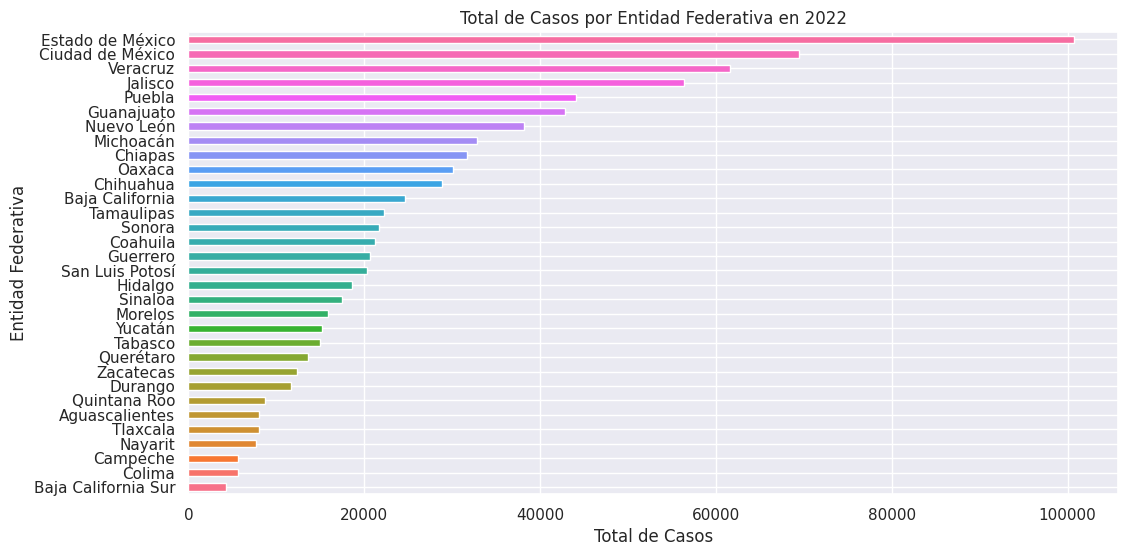

In [157]:
# Análisis exploratorio básico

# Configuraciones de visualización
sns.set_theme()
plt.rcParams["figure.figsize"] = (12, 6)

# 1. Total de casos por entidad en 2022
df_2022 = df[df['Año'] == '2022-01-01']
# Agrupar por Entidad Federativa y sumar
total_por_entidad = df_2022.groupby('Entidad Federativa')['Total'].sum().sort_values()
# Graficar
# Definir una paleta de colores personalizada
colores = sns.color_palette("husl", len(total_por_entidad))
total_por_entidad.plot(kind='barh', title='Total de Casos por Entidad Federativa en 2022', color=colores)
plt.xlabel('Total de Casos')
plt.ylabel('Entidad Federativa')
plt.show()

Como podemos observar, el estado en el que hay menos decesos es Baja California Sur, y el que más hay desesos es Estado de México. Sin embargo, el estado que nos interesa en este análisis es Sonora, en el cuál observamos una cantidad de defunciones un poco mayor a 20,000 en el año 2022. De ese total, ¿Qué proporción fueron hombres y qué proporción fueron mujeres?.

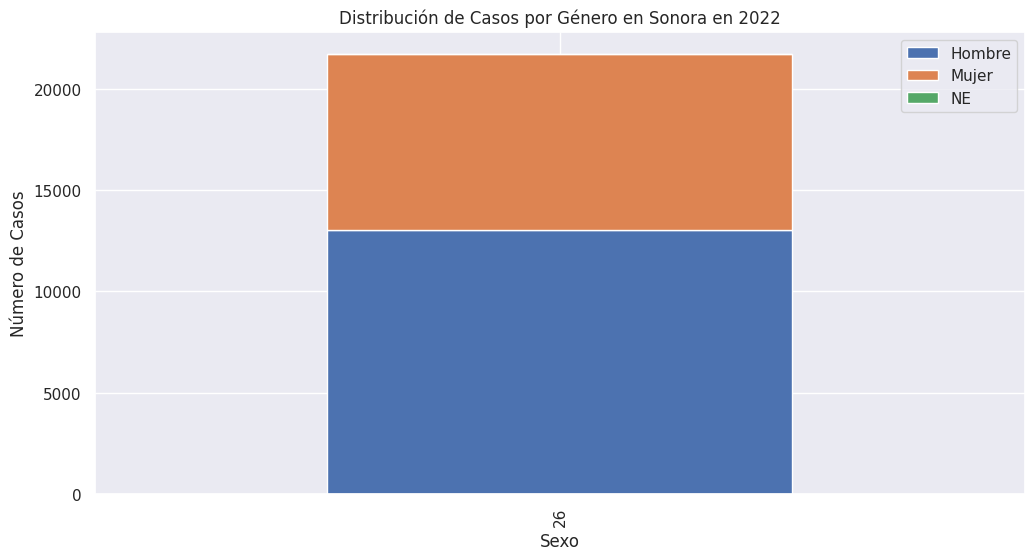

In [173]:
# 2. Distribución de casos por género en Sonora en 2022
df_sonora_2022[['Hombre', 'Mujer', 'NE']].plot(kind='bar', stacked=True, title='Distribución de Casos por Género en Sonora en 2022')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.show()

Como se observa, en Sonora, 2022, hubieron más defunciones de hombres que de mujeres.

Por último, es de nuestro interés, saber la evolución de los casos de muerte en Sonora, a través de los años, es por ello que mediante una agrupación de la base de datos total por año en donde la entidad federativa es Sonora, se gráfica la serie de tiempo de esta evolución;

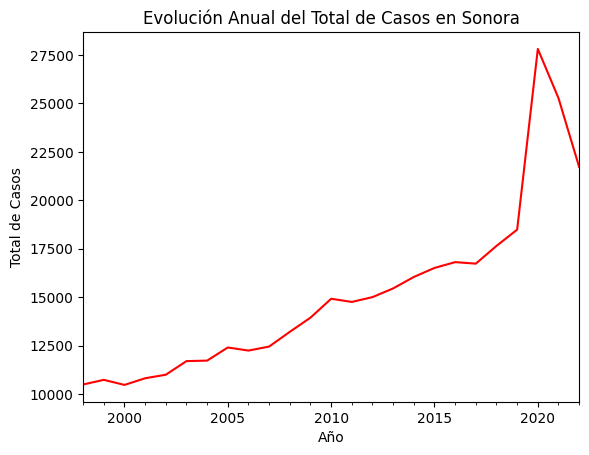

In [145]:
# 3. Evolución anual del total de casos en Sonora
evolucion_sonora = df[df['Entidad Federativa'] == 'Sonora'].groupby(df['Año'])['Total'].sum()
evolucion_sonora.plot(title='Evolución Anual del Total de Casos en Sonora', color='red')
plt.xlabel('Año')
plt.ylabel('Total de Casos')
plt.show()

Se observa un crecimiento abrupto del año 2019 al año 2020, y el motivo que podríamos inferir, es la llegada del COVID-19 ya que justo entre esos años apareció, así que probablemente, ese es el motivo de ese crecimiento repentino, haría falta corroborar eso, con la base de datos de las principales causas de defunciones por año para completar el análisis.

## **Reflexión**
En este proyecto, nos enfocamos en analizar el comportamiento de los datos en 2022, particularizando para el estado de Sonora, dentro de las cosas que se pudieron observar están

1. **Casos de decesos en general**: Observamos una cantidad alta de decesos para este año, sin embargo, el Estado de México rebasa por 3/10 partes al segundo lugar en muertes (Ciudad de México), mientras que la diferencia entre los demás estados es mucho más pequeña.

2. **Distribución por Género**: En la mayoría de las entidades, hay una tendencia a tener más casos reportados para hombres que para mujeres.

3. **Sonora**: Enfocándonos en Sonora, notamos que el total de casos ha tenido una tendencia variable pero creciente a lo largo de los años, aunque del año 2020 al 2022 decrece la cantidad de defunciones. En cuanto a la distribución por género, muestra una proporción relativamente equilibrada pero con una ligera predominancia en casos de hombres.